In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer


2024-05-02 11:03:39.105198: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 11:03:39.110350: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 11:03:39.203233: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 11:03:40.853023: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

def load_classifier():
    """
    Load pre-trained text classification model from HuggingFace
    """
    classifier = pipeline("text-classification", 
                      model = "j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores = False)
    return classifier


def predict_emotion(df, classifier):
    """
    Predict emotions for each sentence in the dataframe
    """
    for index, row in df.iterrows():
        if type(row["Sentence"]) == str:
            predicted_emotion = classifier(row["Sentence"])[0]['label']
            df.at[index, "predicted_emotion"] = predicted_emotion
    return df

def calculate_real_freq(df, groupby_col, count_col):
    """
    Calculate relative frequency of count_col within each group of groupby_col.
    The real freq is then normalized to percentages.
    """
    real_freq = df.groupby(groupby_col)[count_col].value_counts(normalize = True) * 100
    real_freq = real_freq.reset_index(name = 'Relative Frequency')
    return real_freq


def save_df_to_csv(df, csv_outpath):
    """
    Save the dataframe with predicted emotions as .csv 
    """
    df.to_csv(csv_outpath)
    return print("The dataframe with the predicted emotion has been saved to the out folder")



In [52]:

def plot_season(df):
    seasons = df['Season'].unique()

    for season in seasons:
        data = df[df['Season'] == season]
        real_freq = calculate_real_freq(data, 'Season', 'predicted_emotion')

        plot = sns.catplot(data = real_freq, x = "predicted_emotion", y = "Relative Frequency", hue = "Season",
                            kind = "bar", palette = "husl", legend = False)
        plot.set_axis_labels("Predicted Emotion", "Relative Frequency (%)")
        plot.set_titles("{col_name}")


def plot_emotion(df):
    emotions = df['predicted_emotion'].unique()
    
    for emotion in emotions:
        data = df[df['predicted_emotion'] == emotion]
        real_freq = calculate_real_freq(data, 'predicted_emotion', 'Season')

        plot = sns.catplot(data = real_freq, x = "Season", y = "Relative Frequency", hue = "predicted_emotion", 
                            kind = "bar", palette = "husl", legend = False)
        plot.set_axis_labels("", "Relative Frequency (%)")
        plot.set_titles("{col_name}")


In [53]:
df = pd.read_csv("out/data.csv")

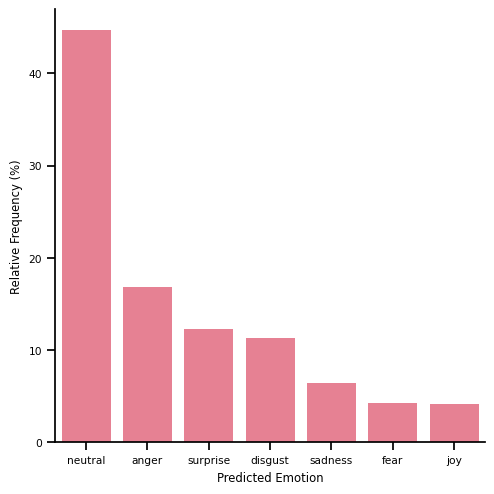

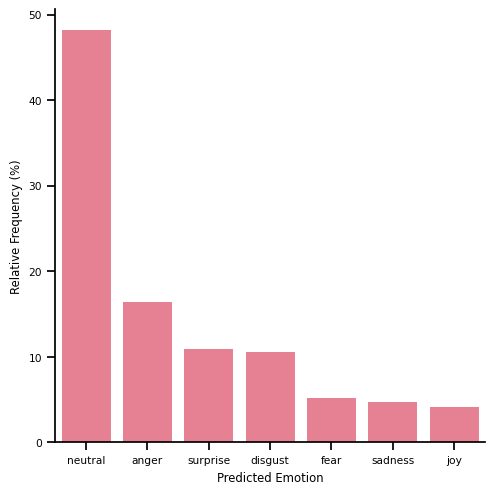

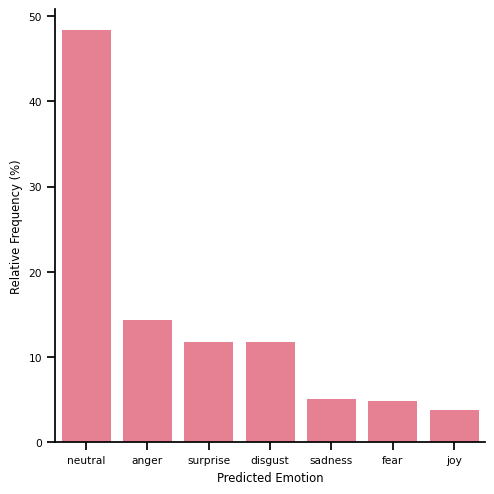

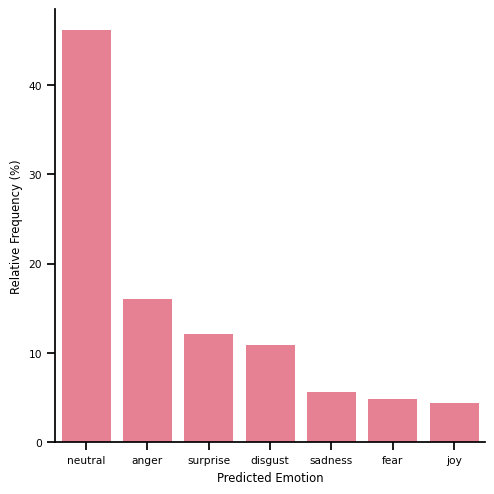

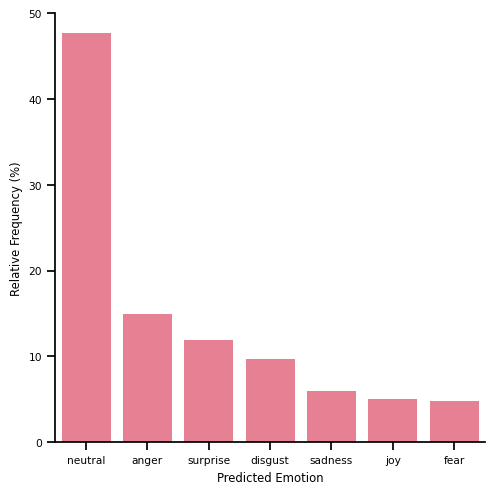

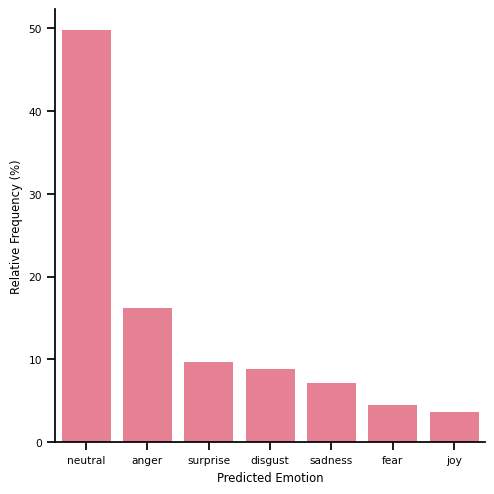

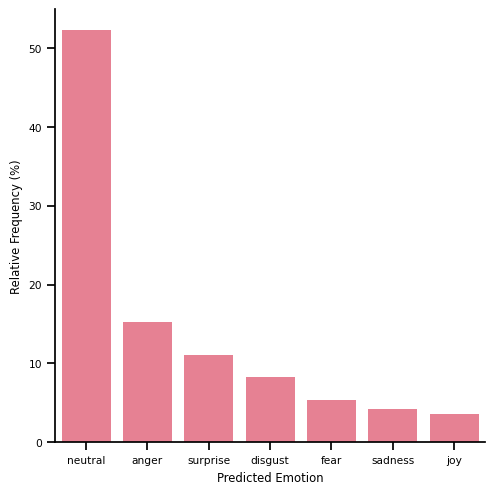

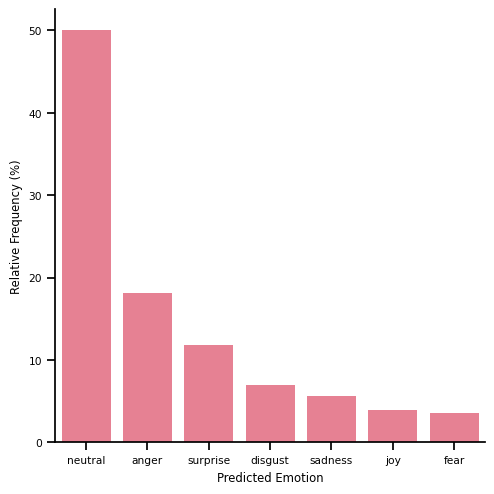

In [55]:
plot_season(df)